# 2. MatPlotLib 기초 연습문제

아래 문제들은 MatPlotLib 패키지의 기본적인 내용을 연습할 수 있는 문제입니다.

1. 아래와 같이 주어진 함수가 있을 때 이 함수를 그래프로 표현하시오

$𝑦=𝑥^3+3𝑥^2+4𝑥+2$

단, 그래프의 제목은 3차 함수 그래프 로 하고, x축의 라벨은 x, y축은 y를 표시한다.<br>
또한 x의 범위는 -10부터 10까지 간격은 0.1로 하고, 선의 색은 빨강, 모양은 짧은 점선으로 한다.

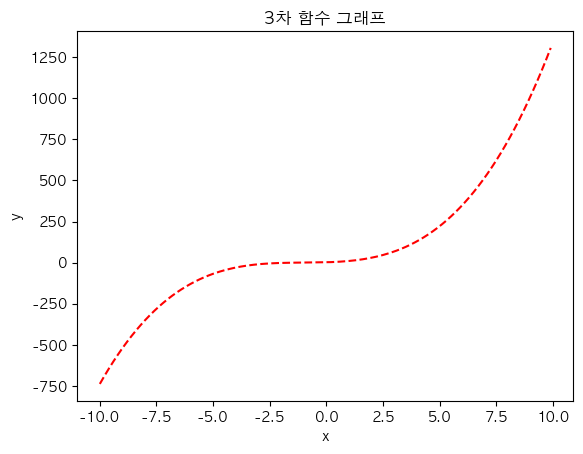

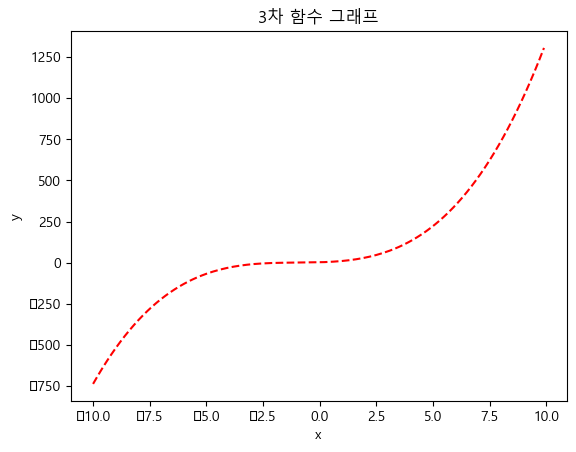

In [28]:
# matplotlib 패키지 중 선그래프를 표현하기 위한 plot 모듈을 불러와야 한다.
import matplotlib.pyplot as plt
# float 형태의 범위를 생성하기 위해선 np.arange 메서드를 사용해야한다. 
import numpy as np

#아래는 한글을 사용할 때 깨지는 문제에 대한 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

# x축 범위 지정
x = np.arange(-10.0,10.0,0.1)
# y축 값을 나타내는 함수 정의
def y_value(x):
    return x**3+3*(x**2)+4*x + 2
# 그래프 타이틀,x,y라벨명 설정
x_label,y_label,title = 'x','y','3차 함수 그래프'

# 위 정보들을 통해 그래프 생성
plt.plot(x,y_value(x),'r--')
plt.title(title) 
plt.xlabel(x_label)
plt.ylabel(y_label)
plt.show()


2. A 학과에서는 학생들을 대상으로 혈액형을 조사한 결과 아래와 같은 값을 얻었다.
```
blood = ['A', 'B', 'O', 'AB']
count = [7, 10, 5, 3]
```
위 결과를 막대그래프로 그리시오. <br>
단 막대의 색은 초록색로 하고 가장 빈도가 높은 순으로 표시한다.

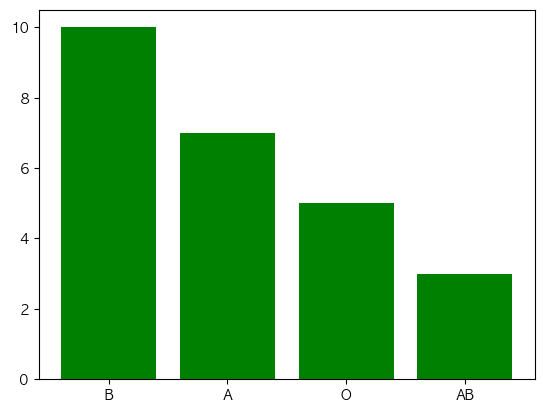

[(10, 'B'), (7, 'A'), (5, 'O'), (3, 'AB')]


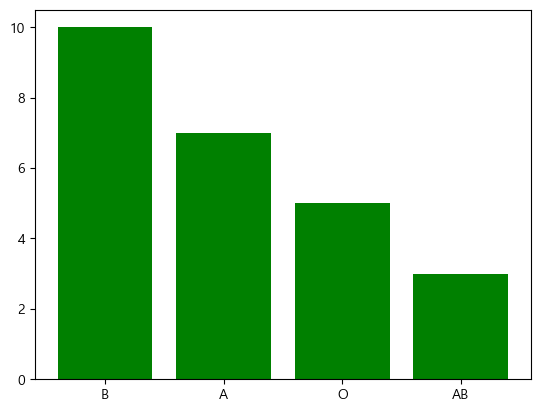

In [24]:
# bar형태로 그래프를 나타내야함 이를 위해 plot.bar 메서드를 사용하면 됨
blood = ['A','B','O','AB']
count = [7,10,5,3]
# bar메서드에는 오름,내림 차순을 정렬하는 기능이 없음 따라서 정렬된 데이터를 bar메서드에 입력해야함.
# 두 데이터 패킹 후 정렬한뒤 언패킹하여 데이터로 전환
sorted_data = sorted(zip(count, blood),reverse=True)
sorted_count , sorted_blood = zip(*sorted_data)

plt.bar(sorted_blood,sorted_count, color = 'green')
plt.show()

3. 아래와 같이 두 개의 ndarray 값이 주어졌을때, 두 변수의 분포를 파악하기 위해 히스토그램을 그려보고자 한다. <br>
두 히스토그램을 겹쳐서 그려보시오.<br>
단, 계급구간의 수(bins)는 10개로 하고 색을 투명하게 하며, 히스토그램이 구분될 수 있도록 두 히스토그램의 색을 다르게 하시오.<br>
그리고 legend()를 이용하여 a와 b가 구분될 수 있도록 하시오.

```
a = np.array([ 74. ,  85.9,  69.9,  76.9,  69.3, 114.4,  53. ,  97.7,  77.6,
               64.6,  88.1, 117.2,  63.2,  84.8,  98.4,  95.2,  80.9, 105.6,
               60.1,  88.4,  84.6, 100.7, 108. ,  79.8,  81.9,  90.3,  71.7,
               44.8,  91.3,  88.4,  74.3,  77.8,  83.9,  87.3, 114.7,  97.5,
               72.5,  74.8,  71.9,  70.7,  77. ,  78.4,  74.8,  82. ,  71.8,
               70. ,  76.5,  90.6,  76.2,  90.2,  69.5,  69.7,  78. , 103.6,
               76.3,  78.5, 104.2, 100.7,  93.5,  50.6,  74.4,  87.3,  93.1,
               80.9,  77.1,  52.9,  85.5,  93.6,  89.7,  75.2,  78.8,  96.6,
               83.8,  84.3,  91.4, 104.9,  87.3,  92.3,  65.2,  76.8,  98.9,
               80.8,  68.5,  61.4,  91.4,  56.2,  89.2,  70. ,  72.7,  71.5,
               79.1,  85.1, 105.6,  73.1, 122.2,  73.7,  88.2,  83.7, 101.2,
               68.6])
b = np.array([135. , 115.1, 114.3, 107.1, 126.2, 119.5, 101.1, 116.9, 117.8,
               123.8, 123. , 121.9, 116.9, 123.3, 128.3, 131. , 125.3, 123.7,
               133.1, 124. , 114.4, 111.9, 141.8, 125.4, 121.8, 137.1, 119.5,
               126.2, 116.6, 122.5, 146.4, 110.1, 131.8, 124. , 123.8, 107.3,
               119.4, 118.1, 118.1, 123.9, 134.5, 133.5, 135.5, 103.7, 114. ,
               120.8, 131.1, 115.8, 128.4, 116.6, 128.9, 101.6, 137.8, 119.4,
               117. ,  98. , 110.5, 120.2, 129.5, 111.8, 130.5, 110.2, 121.9,
               115.5, 126.8, 124.2, 119.9, 136.4, 138.5, 127.7, 115.6, 108.9,
               114.9, 107.3, 118. ,  98.1, 131.5, 128.5, 120.4, 118.8,  99. ,
               120.2, 119.5, 102.6, 114.4, 119.4, 123.7, 112.5, 104.2, 122. ,
               128.7, 124.8, 106.5, 120.6, 133.4, 130.7, 128.7, 125.1, 108.7,
               109.2])
```

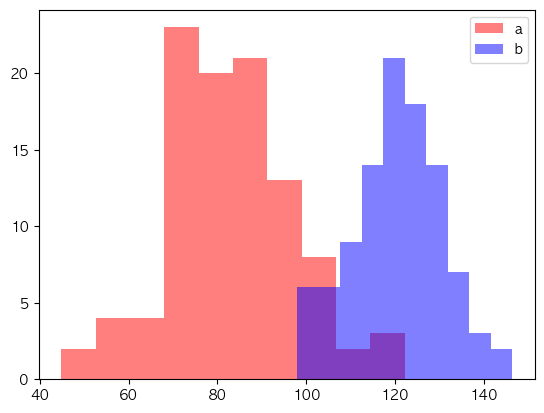

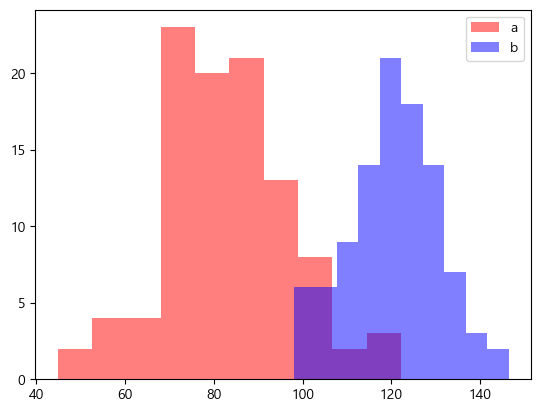

In [40]:
# a,b 변수 선언

a = np.array([ 74. ,  85.9,  69.9,  76.9,  69.3, 114.4,  53. ,  97.7,  77.6,
               64.6,  88.1, 117.2,  63.2,  84.8,  98.4,  95.2,  80.9, 105.6,
               60.1,  88.4,  84.6, 100.7, 108. ,  79.8,  81.9,  90.3,  71.7,
               44.8,  91.3,  88.4,  74.3,  77.8,  83.9,  87.3, 114.7,  97.5,
               72.5,  74.8,  71.9,  70.7,  77. ,  78.4,  74.8,  82. ,  71.8,
               70. ,  76.5,  90.6,  76.2,  90.2,  69.5,  69.7,  78. , 103.6,
               76.3,  78.5, 104.2, 100.7,  93.5,  50.6,  74.4,  87.3,  93.1,
               80.9,  77.1,  52.9,  85.5,  93.6,  89.7,  75.2,  78.8,  96.6,
               83.8,  84.3,  91.4, 104.9,  87.3,  92.3,  65.2,  76.8,  98.9,
               80.8,  68.5,  61.4,  91.4,  56.2,  89.2,  70. ,  72.7,  71.5,
               79.1,  85.1, 105.6,  73.1, 122.2,  73.7,  88.2,  83.7, 101.2,
               68.6])
b = np.array([135. , 115.1, 114.3, 107.1, 126.2, 119.5, 101.1, 116.9, 117.8,
               123.8, 123. , 121.9, 116.9, 123.3, 128.3, 131. , 125.3, 123.7,
               133.1, 124. , 114.4, 111.9, 141.8, 125.4, 121.8, 137.1, 119.5,
               126.2, 116.6, 122.5, 146.4, 110.1, 131.8, 124. , 123.8, 107.3,
               119.4, 118.1, 118.1, 123.9, 134.5, 133.5, 135.5, 103.7, 114. ,
               120.8, 131.1, 115.8, 128.4, 116.6, 128.9, 101.6, 137.8, 119.4,
               117. ,  98. , 110.5, 120.2, 129.5, 111.8, 130.5, 110.2, 121.9,
               115.5, 126.8, 124.2, 119.9, 136.4, 138.5, 127.7, 115.6, 108.9,
               114.9, 107.3, 118. ,  98.1, 131.5, 128.5, 120.4, 118.8,  99. ,
               120.2, 119.5, 102.6, 114.4, 119.4, 123.7, 112.5, 104.2, 122. ,
               128.7, 124.8, 106.5, 120.6, 133.4, 130.7, 128.7, 125.1, 108.7,
               109.2])

# 히스토그램을 그리기 위한 메서드 plt.hist
# 조건 계급구간의 수(bins)는 10개로 하고 색을 투명하게 하며, 히스토그램이 구분될 수 있도록 두 히스토그램의 색을 다르게 하시오.그리고 legend()를 이용하여 a와 b가 구분될 수 있도록 하시오.
# 투명도 설정 : alpha
plt.hist(a,bins=10,facecolor = 'red',alpha = 0.5,)
plt.hist(b,bins=10,facecolor = 'blue',alpha = 0.5,)
# legend 메서드를 통해 범례 설정
plt.legend(['a','b'])
plt.show()

4. seaborn 패키지의 kdeplot를 이용하여 위(3번)에서 그린 것을 보다 부드럽게 그려보시오.

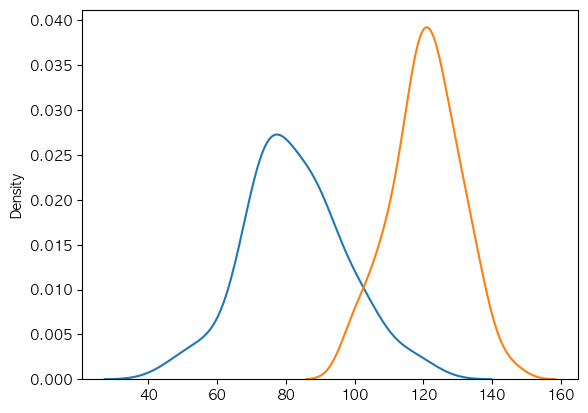

<Axes: ylabel='Density'>

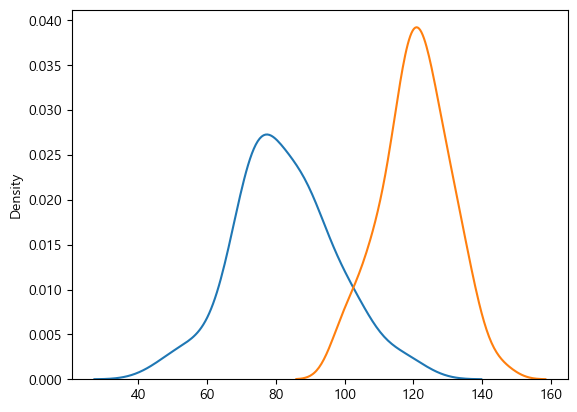

In [41]:
# seaborn 패키지 임포트
import seaborn as sns
sns.kdeplot(a)
sns.kdeplot(b)

5. 아래 주어진 네개의 함수에 대해 화면을 2x2 타일로 나누어 네 개의 그래프를 그리시오.<br>
x값은 같은 열인 경우 공유하고, y값도 같은 행이면 공유한다.<br>
x는 0.1부터 5까지 0.1 간격의 값을 사용한다.<br>
log와 sqrt는 numpy에서 제공하는 함수를 사용한다.<br>
그래프 제목은 "타일 형태로 여러 그래프 그리기"로 한다.

- $𝑦=𝑙𝑜𝑔(𝑥)$
- $𝑦=𝑠𝑞𝑟𝑡(𝑥)$
- $𝑦=𝑥$ 
- $𝑦=𝑥^2$

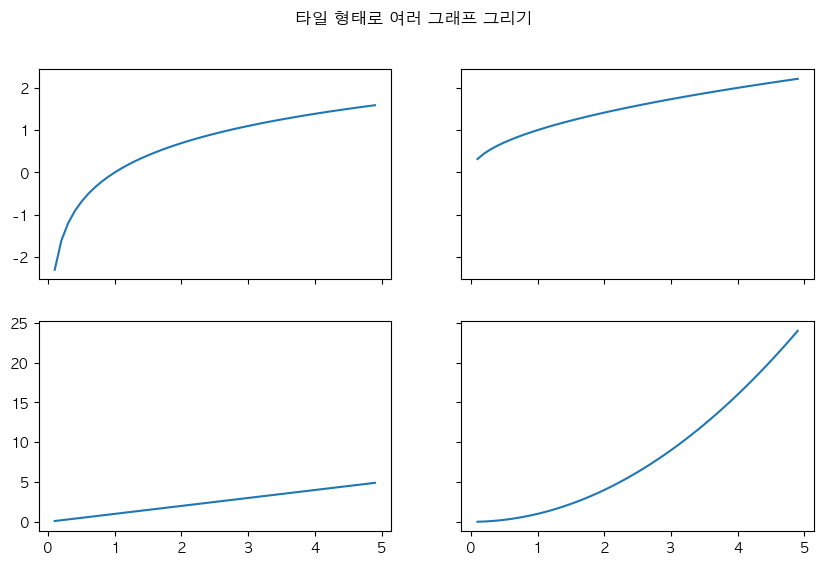

C:\Users\jun\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


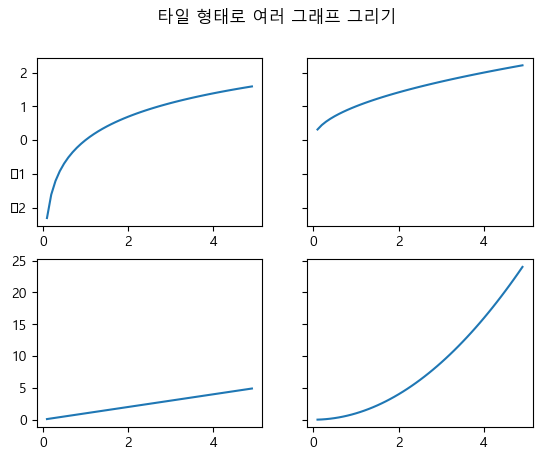

In [55]:
# 피규어를 2*2 타일로 나누어 4개의 그래프를 그리기 위해선 subplots 메서드를 활용해야함
# subplots 메서드의 파라미터로 (행,열,x축 공유 여부, y축 공유 여부)
# sharex,y로 들어갈 수 있는 값은 = [true,false,col,row]
f,subplot = plt.subplots(2,2,sharex='col',sharey='row')
# x 값 선언
x = np.arange(0.1,5.0,0.1)
# 로그 함수
f.suptitle('타일 형태로 여러 그래프 그리기')
subplot[0,0].plot(x,np.log(x))
# sqrt 함수
subplot[0,1].plot(x,np.sqrt(x))
# 1차함수
subplot[1,0].plot(x,x)
# 2차함수
subplot[1,1].plot(x,x**2)

plt.show()